# Generating simulated training data

The purpose is to generate a set of data for training a Neural Network to recognise ions on CCD image exposures during an ion trapping experiment.  Initally, I am trying to generate somewhat realistic ion images and noise to see if it is possible for the network to discern an ion on the camera image. Ideally, this can then be used to automate the trapping procedure and help to detect dim and obscured ion images amid noisy images during trapping runs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import axes
import seaborn as sns
import pandas as pd

In [33]:
#Initialise image array for building noisy training dataset.
image = np.random.randint(0,16000,(1024,1024))

In [34]:
#This would be an idealised field on the camera with no ion present
#and zero noise.
clean_image = np.zeros((1024,1024))

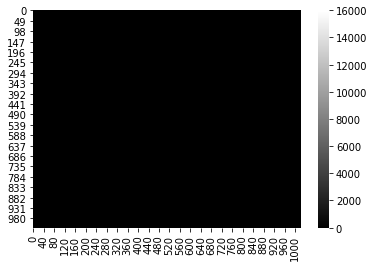

In [35]:
sns.heatmap(clean_image,vmin=0, vmax=16000, cmap="binary_r")

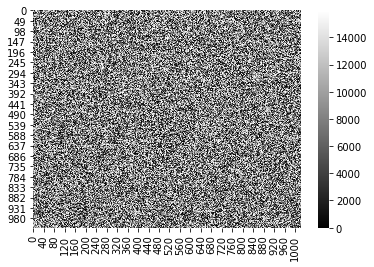

In [36]:
sns.heatmap(image,cmap="binary_r")

Experimenting with different ways of generating somewhat authentic noisy images based on the output of the CCD camera when doing trapping runs.

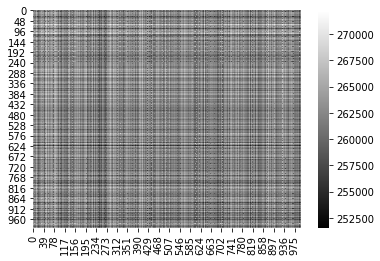

In [37]:
#Generating a 2d normal distribution representative of an ion on the camera image.
cov = [[10,0],[0,10]]
mean = [512,512]
#ions = [[]]
x_ion, y_ion = np.random.multivariate_normal(mean, cov, (1000)).T


#This output is nonsense for what I am trying to achieve.  I think it is
#due to the way that multivariate_normal function is generating the output.
#The distribution of points is a 2d normal but in terms of density not 
#weighting.  The output I require I think should have 1 additional dimension/
#parameter so the spacial distribution and pixel value is accounted for.
#The data here is too sparse to make up full a full image of 1024*1024.
xy_ions = np.outer(x_ion, y_ion)
sns.heatmap(xy_ions,cmap='binary_r')

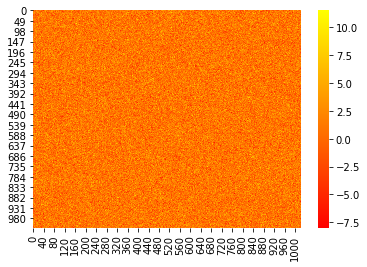

In [38]:
ions = np.random.normal(1,2,(1024,1024))
sns.heatmap(ions,cmap="autumn")

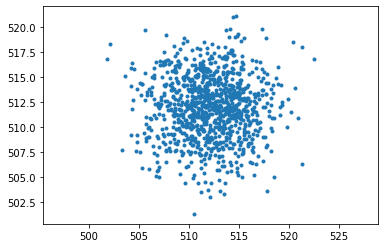

In [39]:
plt.plot(x_ion, y_ion, '.')
plt.axis('equal')
plt.show()

In [40]:
ions_df = pd.DataFrame(ions)

In [41]:
ions_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-1.245142,-2.166264,1.432233,0.720528,-1.342640,0.668129,0.043088,0.515801,1.819171,-0.177800,...,-0.621581,0.250456,1.498214,0.302001,-1.315662,1.740321,-0.173180,1.605008,1.751827,2.169906
1,-2.179416,2.743223,1.270312,2.642772,2.627444,-1.459696,4.831857,0.672754,-0.510742,0.037444,...,1.151069,-1.522639,-1.819810,1.861931,-0.879611,1.383978,-0.351807,3.362868,1.263462,-1.882304
2,2.965767,1.552824,0.534563,1.235196,2.292061,1.029277,3.159744,5.081346,-1.238101,0.495957,...,1.714318,-1.372786,3.057261,1.833202,-2.887940,0.692892,1.188770,3.406603,-0.108520,2.554678
3,0.092024,-1.012561,-1.254831,-2.625951,0.058325,0.642436,1.629626,-0.531201,-0.237884,-0.339576,...,3.709495,1.220522,1.430743,-1.492209,3.042784,-1.140711,-1.142171,1.894928,1.615792,3.152350
4,1.633514,-2.871896,-1.641976,-1.972609,-0.277440,-4.562632,2.520408,0.256452,-1.223141,-1.303100,...,4.367965,-2.436267,0.006532,2.506272,-2.440054,1.042872,2.026423,-2.036798,-1.796258,-0.166570


Experimenting with different ways of generating a believable simulation of an ion image as it might appear on the CCD camera in the presence of an idealised, zero noise background.

In [42]:
from scipy import signal
def gauss_2d(w, sigma):
    x = signal.gaussian(w, sigma)
    y = signal.gaussian(w, sigma)
    return (x, y)

In [43]:
'''
k = np.random.normal(50, 5, (100,100))
def normal_2d(mean, std, number):
    x = np.random.normal(mean, std, number)
    y = np.random.normal(mean, std, number)
    w_2d = np.outer(x,y)
    return (x,y)

x, y = normal_2d(1, 5,100)

plt.hist(k)
#plt.xlim(0, 1024)
#plt.ylim(0, 1024)
plt.show()

'''

'\nk = np.random.normal(50, 5, (100,100))\ndef normal_2d(mean, std, number):\n    x = np.random.normal(mean, std, number)\n    y = np.random.normal(mean, std, number)\n    w_2d = np.outer(x,y)\n    return (x,y)\n\nx, y = normal_2d(1, 5,100)\n\nplt.hist(k)\n#plt.xlim(0, 1024)\n#plt.ylim(0, 1024)\nplt.show()\n\n'

In [320]:
ion_x, ion_y = gauss_2d(256, 2)

ions = np.outer(ion_x, ion_y)


In [321]:
#Want this to appear like a greyscale mode image when creating the images later

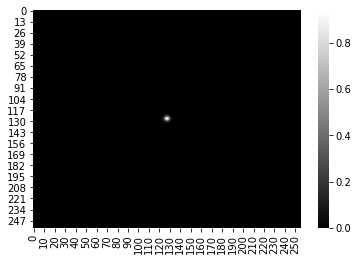

In [322]:
#The 2d gaussian function seemingly yields the best ion image reproduction.
sns.heatmap(ions,cmap="binary_r")

The uniform random noise with the right output shape is much closer to true white noise than is actually seen on the CCD Camera.  For now this will do for testing as it is much worse than the camera noise so it will be interesting to see if ions are discernable.  Later may have to amend with a more bespoke noise function or real image data. 

In [323]:
dark = np.random.uniform(0,1, (256,256))
#dark = np.random.standard_gamma(3,(1024, 1024))



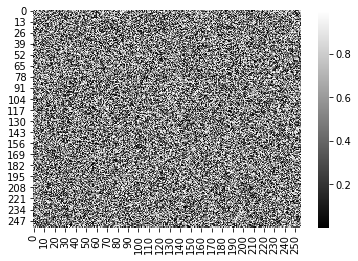

In [324]:
sns.heatmap(dark,cmap="binary_r")

In [325]:
#Define a function that normalises each values in the 2d array correctly.
#Will then vectorise with numpy to build a function that applies to 
#all values.
def normalise_2d(value, maxi, mini):
    '''Takes value and returns normalised based on max and min inputs
    given given as arguments'''
    norm_val = (value - mini)/(maxi - mini)
    return norm_val
#Vectorised version
normalise_2d_vect = np.vectorize(normalise_2d)

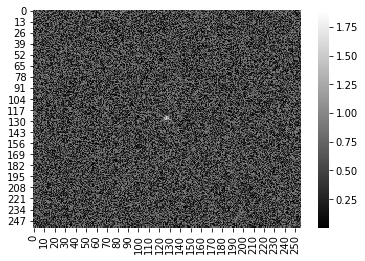

In [326]:
#dark = normalise_2d_vect(dark,25 , 0)
#ions = ions*20

noisy_image = dark + ions

sns.heatmap(noisy_image,cmap="binary_r")

The above gives a weird output whereby the lower half of the noise on the image is bright and the upper half is dark.  I think this is due to the way the loop is iterating over one side of the "image" and not the other so it is applying the transformation correctly up to half way and then requires flipping somehow to be correct.

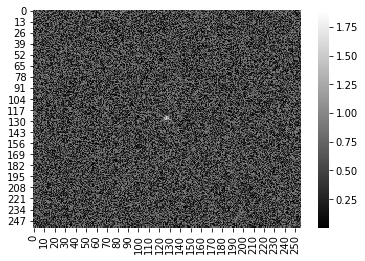

In [327]:
#This looks good.  A noisy image with an 2D gaussian ion.  Image is normalised
#in terms of pixel values so will be a good input for the Convolutional 
#Neural Network.
sns.heatmap(noisy_image, cmap='binary_r')

There will be 3 cases for the initial datasets: Ion on clean background, noise with no ion and noisy background with ion.

I will ensure that there are an equal number of "ion" to "no ion" labels to try to balance the training.

In [328]:
print(np.max(dark))
print(np.max(ions))
print(np.max(noisy_image), np.min(noisy_image))

#It may later be an issue that the maximum value for the noise is above the
#ion.  I will press on for now and see what happens and bear this in mind
#as a potential improvement later.

0.9999493730318882
0.9394130628134759
1.8933200666566106 2.8785985367596467e-05


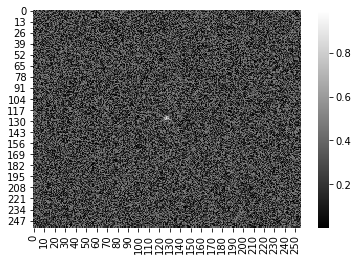

In [329]:
#noisy_image = normalise_2d_vect(noisy_image,24.06 , 0)
#Instead of normalising to 1 here, leave until working with Keras, instead
#create usuable images here.

noisy_image = normalise_2d_vect(noisy_image, 1.902, 0)

sns.heatmap(noisy_image, cmap='binary_r')

Want to introduce a different noise model into the training data for no ions to try to make the model more robust against false positives.   This might not work well if the particular distribution of the noise is incorrect and the model focusses on the wrong features.  Hopefully, this will not be an issue if I can get real camera images to use later as the training set.

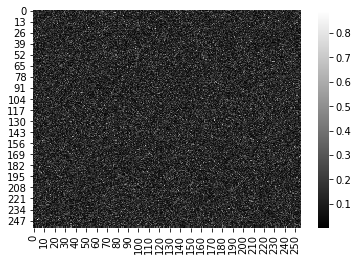

In [330]:
#Creating a standard_gamma distribution noise profile and normalising.
gamma_noise = normalise_2d_vect(np.random.standard_gamma(3, (256,256)),20,0)
sns.heatmap(gamma_noise, cmap='binary_r')

In [331]:
#reshaping the arrays so they come through with correct input shape for 
#greyscale images.
'''
dims = 256
noisy_image = np.reshape(noisy_image,(dims, dims, 1))
ions = np.reshape(ions, (dims, dims, 1))
dark = np.reshape(dark, (dims, dims, 1))
gamma_noise = np.reshape(gamma_noise, (dims, dims, 1))
'''

'\ndims = 256\nnoisy_image = np.reshape(noisy_image,(dims, dims, 1))\nions = np.reshape(ions, (dims, dims, 1))\ndark = np.reshape(dark, (dims, dims, 1))\ngamma_noise = np.reshape(gamma_noise, (dims, dims, 1))\n'

In [332]:
#Create a set of directories which will consistute training data
#populating with mixed simulated images into correctly labelled sets.

import cv2 as cv

for i in range(800):
    cv.imwrite('Sim_Cam_Images/train/Ion/ion_image_{0}.png'.format([i]), noisy_image)
for j in range(200):
    cv.imwrite('Sim_Cam_Images/train/Ion/clean_ion_image{0}.png'.format([j]), ions)
for k in range(500):
    cv.imwrite('Sim_Cam_Images/train/No_ion/no_ion_noise_{0}.png'.format([k]), dark)
    cv.imwrite('Sim_Cam_Images/train/No_ion/gamma_noise_{0}.png'.format([k]), gamma_noise)
for l in range(200):
    cv.imwrite('Sim_Cam_Images/validation/No_ion/gamma_noise_{0}.png'.format([l]), gamma_noise)
    cv.imwrite('Sim_Cam_Images/validation/No_ion/no_ion_noise_{0}.png'.format([l]), dark)
    cv.imwrite('Sim_Cam_Images/validation/Ion/ion_image_{0}.png'.format([l]), noisy_image)
    cv.imwrite('Sim_Cam_Images/validation/Ion/clean_ion_image_{0}.png'.format([l]), ions)

# Augmenting the dataset and building the Convolutional Neural Network

It seems the best way to create a training data set of varied images is to take the dark-field with and without ions that were created above and use the Keras package in tensorflow to augment the data.  I will implement duplicates and introduce shifts and rotations etc to create a varied set of training data and validation data for the model.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2 as cv
%matplotlib inline

In [4]:
#Going to try converting everything to Greyscale to reduce the size of the 
#tensor in the training model.  Using the full size of the image, I run out
#of memory trying to train the model and there is not enough information 
#available to train the model properly when I reduce the scale of the input.
'''
path_tr_ion = 'Sim_Cam_Images/train/Ion'
path_tr_noion = 'Sim_Cam_Images/train/No_ion'
path_val_ion = 'Sim_Cam_Images/validation/Ion'
path_val_noion = 'Sim_Cam_Images/validation/No_ion'
for img in os.listdir(path_tr_ion):
    Ion_array_tr = cv.imread(os.path.join(path_tr_ion, img),cv.IMREAD_GRAYSCALE)

for img in os.listdir(path_tr_noion):
    Noion_array_tr = cv.imread(os.path.join(path_tr_noion, img),cv.IMREAD_GRAYSCALE)
    
    '''

"\npath_tr_ion = 'Sim_Cam_Images/train/Ion'\npath_tr_noion = 'Sim_Cam_Images/train/No_ion'\npath_val_ion = 'Sim_Cam_Images/validation/Ion'\npath_val_noion = 'Sim_Cam_Images/validation/No_ion'\nfor img in os.listdir(path_tr_ion):\n    Ion_array_tr = cv.imread(os.path.join(path_tr_ion, img),cv.IMREAD_GRAYSCALE)\n\nfor img in os.listdir(path_tr_noion):\n    Noion_array_tr = cv.imread(os.path.join(path_tr_noion, img),cv.IMREAD_GRAYSCALE)\n    \n    "

In [5]:
#So far, only have training dataset but will come back and figure out what
#is needed for validation and testing when I have a more varied image base.
#This will also be easier with the real camera data when I can get it.
train_path = 'Sim_Cam_Images/train/'
validate_path = 'Sim_Cam_Images/validation/'
TARGET_SIZE = (256, 256)
batch_size = 28
epochs = 15

#train_image_generator = ImageDataGenerator(rescale=1./255) #Generator for training data
#validation_image_generator = ImageDataGenerator(rescale =1./255) # Generator for validation data





train_data_gen = ImageDataGenerator().flow_from_directory(directory=train_path,
                                                          color_mode='rgb', 
                                                          target_size=TARGET_SIZE,  
                                                          batch_size=batch_size,
                                                          shuffle=True,class_mode='binary')

val_data_gen = ImageDataGenerator().flow_from_directory(directory=validate_path,
                                                         color_mode='rgb',
                                                         target_size=TARGET_SIZE,
                                                         batch_size=batch_size,
                                                        shuffle=True,
                                                        class_mode='binary')

 

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
sample_training_images, _ = next(train_data_gen)

In [7]:
#Defining this function so I can look at the images we are pulling in.

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

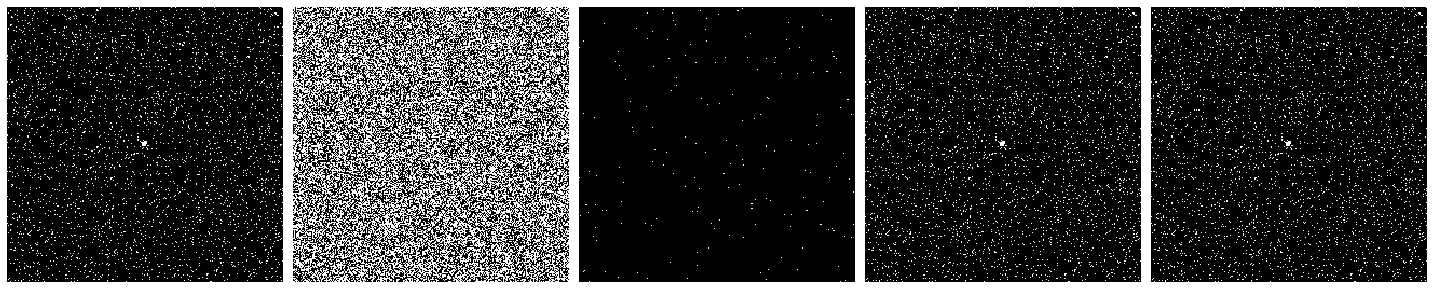

In [8]:
plotImages(sample_training_images)

In [9]:
num_ion_tr = len(os.listdir('Sim_Cam_Images/train/Ion'))
num_noion_tr = len(os.listdir('Sim_Cam_Images/train/No_ion'))

num_ion_val = len(os.listdir('Sim_Cam_Images/validation/Ion'))
num_noion_val = len(os.listdir('Sim_Cam_Images/validation/No_ion'))

print(num_ion_tr, num_noion_tr, num_ion_val, num_noion_val)



total_train = num_ion_tr + num_noion_tr
total_val = num_ion_val + num_noion_val
print('--')
print(total_train, total_val)

1001 1001 401 401
--
2002 802


In [10]:
#Define model for Neural Network.  Will start with a basic recipe of 3 convolution blocks
#with a max pooling layer in each of them.  Finally, a fully connected layer
#with 512 units activated by a "relu" function.

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [11]:
#Compile the model and view model summary. Will use the adam optimiser for now
#many of the parameters used in this model may be subject to change later 
#to make improvements.
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

# Train the model

Initial run of training the CNN using the above model.  It is worthy of note that, due to the nature of the simulated data currently, the model is expected to be significantly overfit.  This can be remedied later perhaps by augmenting the data to make a more realistic and varied dataset.

In [13]:
#Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 71 steps, validate for 28 steps
Epoch 1/15
71/71 [==============================] - 12s 172ms/step - loss: 0.0730 - accuracy: 0.9838 - val_loss: 4.9386e-06 - val_accuracy: 1.0000
Epoch 2/15
71/71 [==============================] - 5s 66ms/step - loss: 2.1745e-06 - accuracy: 1.0000 - val_loss: 3.9620e-06 - val_accuracy: 1.0000
Epoch 3/15
71/71 [==============================] - 5s 67ms/step - loss: 1.6475e-06 - accuracy: 1.0000 - val_loss: 3.1015e-06 - val_accuracy: 1.0000
Epoch 4/15
71/71 [==============================] - 5s 67ms/step - loss: 1.2552e-06 - accuracy: 1.0000 - val_loss: 2.3714e-06 - val_accuracy: 1.0000
Epoch 5/15
71/71 [==============================] - 5s 68ms/step - loss: 9.2558e-07 - accuracy: 1.0000 - val_loss: 1.7757e-06 - val_accuracy: 1.0000
Epoch 6/15
71/71 [==============================] - 5s 68ms/step - loss: 6.9193e-07 - accuracy: 1.0000 - val_loss: 1.3220e-06 - val_accuracy: 1.0000
Epoch 7/15
71/71

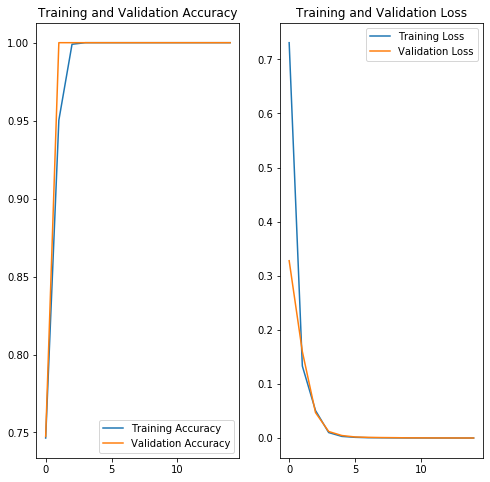

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")
plt.show()

# Initial results

The model seems to train and fit effectively as shown by the immediate tracking to the low loss and high accuracy.  The validation is, for now, slightly misleading as the validation data is currently a subset copy of the training data which means that it will almost certainly be overfit on another set of validation data.  This does however, seem to show that the model works for these kind of ion images in principle.

Currently, the ion always appears in the middle of the image.  The first thing to modify is to augment the training data to introduce shifts such that the model can be robust to different ion positions.

# Augment data and apply

In [21]:
#This will rotate training data images randomly up to 45 degrees
#Introduce a width and height shift which should modify the ion location
#and provide a zoom which will change the ion scale simulating, brighter
#or darker ions.

IMG_HEIGHT = 256
IMG_WIDTH = 256

image_gen_train = ImageDataGenerator(rotation_range=45,
                                     width_shift_range=.40,
                                     height_shift_range=.40,
                                     fill_mode='wrap',
                                     zoom_range=0.5)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_path,
                                                    shuffle=True,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


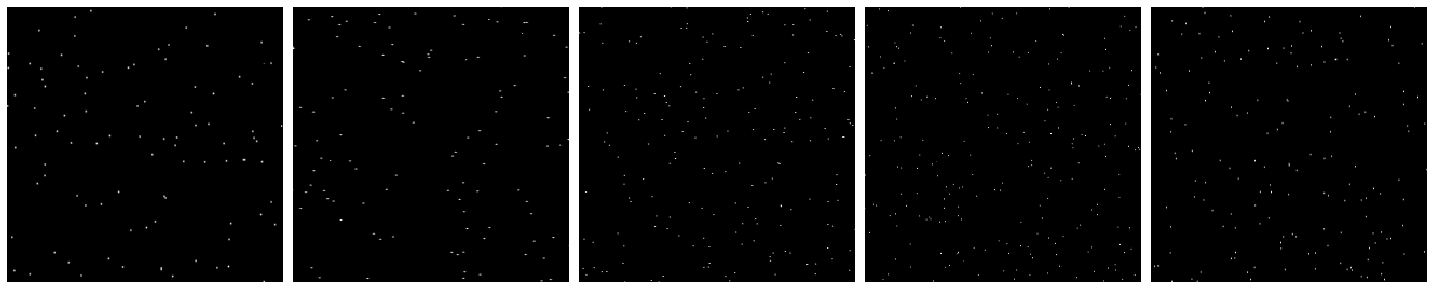

In [22]:
#Function to visualise data to see effect of augmentation.
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [23]:
#Doing the same augmentation for the validation set.  Do this in this
#case because the validation is set will receive very much needed
#variation.  Hopefully, this might mitigate some of the overfitting.
image_gen_val = ImageDataGenerator(rotation_range=30,
                                     width_shift_range=.40,
                                     height_shift_range=.40,
                                     fill_mode='wrap',
                                     zoom_range=0.5)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=validate_path,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                class_mode='binary')

Found 800 images belonging to 2 classes.


In [24]:
#Train model on new augmented data.
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 71 steps, validate for 28 steps
Epoch 1/15
71/71 [==============================] - 34s 472ms/step - loss: 9.3010e-05 - accuracy: 1.0000 - val_loss: 1.4989e-04 - val_accuracy: 1.0000
Epoch 2/15
71/71 [==============================] - 33s 472ms/step - loss: 8.4335e-05 - accuracy: 1.0000 - val_loss: 1.5208e-04 - val_accuracy: 1.0000
Epoch 3/15
71/71 [==============================] - 33s 471ms/step - loss: 7.9732e-05 - accuracy: 1.0000 - val_loss: 1.3194e-04 - val_accuracy: 1.0000
Epoch 4/15
71/71 [==============================] - 34s 472ms/step - loss: 6.5652e-05 - accuracy: 1.0000 - val_loss: 1.0740e-04 - val_accuracy: 1.0000
Epoch 5/15
71/71 [==============================] - 34s 472ms/step - loss: 4.9620e-05 - accuracy: 1.0000 - val_loss: 8.8838e-05 - val_accuracy: 1.0000
Epoch 6/15
71/71 [==============================] - 34s 473ms/step - loss: 4.7657e-05 - accuracy: 1.0000 - val_loss: 8.3491e-05 - val_accuracy: 1.0000
Ep

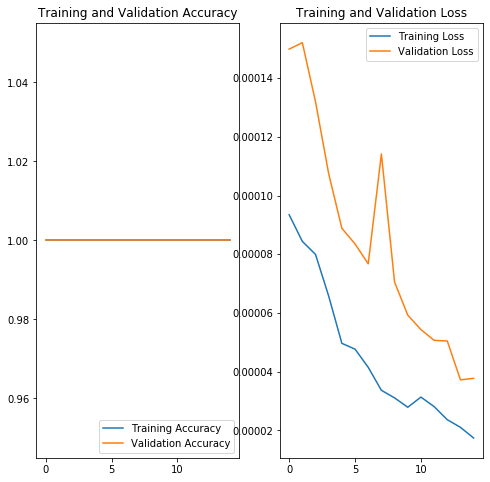

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")
plt.show()

# Predictions

Want to get some idea of predictions. Although this will not use a different data set, it will be useful to clarify the time for single or small batches of image classification to give a good indicator of whether there will be a time bottleneck for real-time use on an experiment.

In [26]:

TARGET_SIZE = (256,256)
batch_size = 5

test_data_gen = ImageDataGenerator().flow_from_directory(directory=validate_path,
                                                         color_mode='rgb',
                                                         target_size=TARGET_SIZE,
                                                         batch_size=batch_size,
                                                        shuffle=True,
                                                        class_mode='binary')


test_images = next(test_data_gen)

Found 800 images belonging to 2 classes.


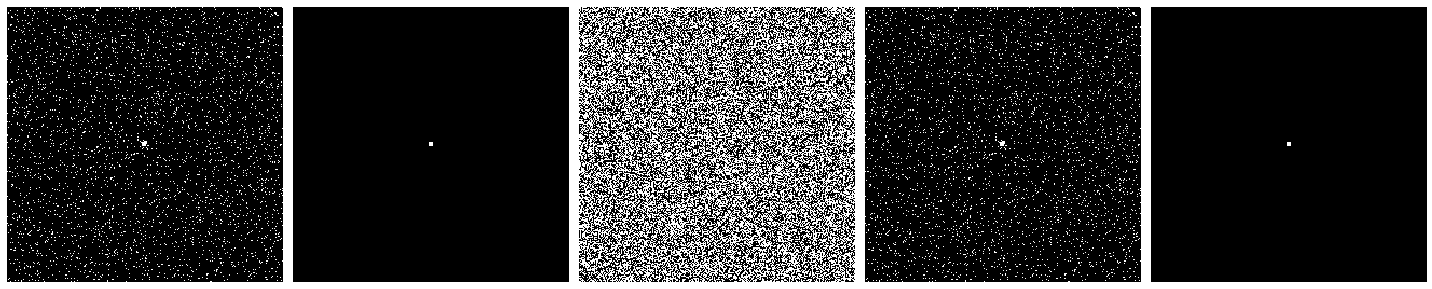

In [27]:
plotImages(test_images[0])

In [38]:
test_images, img_labels = next(test_data_gen)

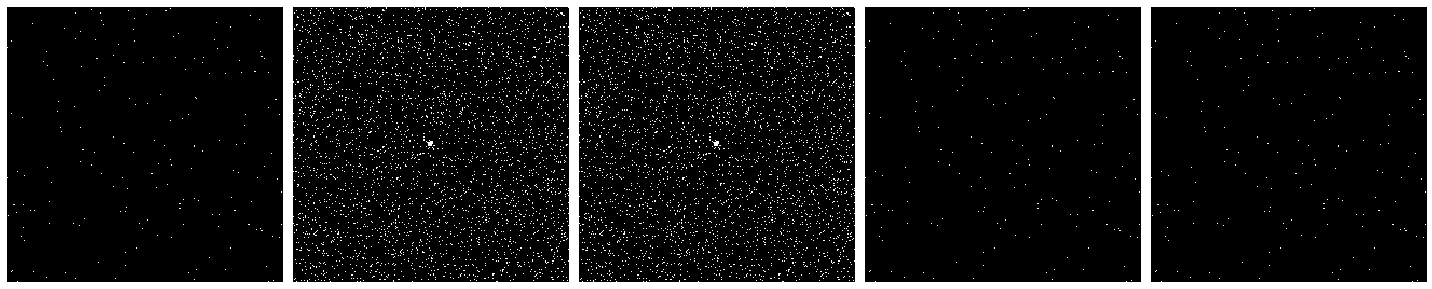

In [39]:
plotImages(test_images)

In [43]:
prediction = model.predict_classes(test_images)

performance = model.evaluate(test_images, img_labels)

5/5 [==============================] - 0s 1ms/sample - loss: 2.6461e-10 - accuracy: 1.0000


In [40]:
print(img_labels)

[1. 0. 0. 1. 1.]


# Result of Test

The model appears to be able to make a prediction on 5 test images with 100% accuracy.  The model performs at 1 ms/sample on my machine, perhaps a little slower on the lab computer but should be well within acceptable parameters such that it will not be the bottleneck on data-rate for an automation procedure implementation.